# SHIP EXPLORATION
Ships are large, complex vessels designed to travel across water, carrying people, goods, or performing specialized tasks like fishing, research, or military operations. They come in various shapes and sizes, each tailored to specific purposes.

Ships can be categorized based on their primary function. For example:

- Cargo Ships: Transport goods like containers, oil, or bulk materials.

- Passenger Ships: Carry people, such as cruise ships or ferries.

- Fishing Vessels: Designed for catching fish or other seafood.

- Specialized Ships: Include research vessels, tugboats, or military ships.

Each category has subcategories that further define their purpose. For instance, cargo ships can be divided into container ships, tankers, or bulk carriers.

![Ship Main Dimensions](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj6u5H2jB51My46auYrGm-ij4VyigCjazDASo9cs-4mF-YSIotrZiRoxGuIM8zY1sB6AbWV-Rdvlp0-mGvP3WhWdWxR9Hm_rypmIHlglSDndpoGem7gyOv3suPeVlVXcwWAFXu_G5Xq_Q/s1600/Capture_257.jpg)


To describe a ship’s size and capacity, we use specific measurements:

- Length: This is the distance from the front (bow) to the back (stern) of the ship. Longer ships generally have more space for cargo or passengers.

- Beam: The width of the ship at its widest point. A wider beam often means greater stability but may limit the ship’s ability to navigate narrow waterways.

- Gross Tonnage (GT): A measure of the ship’s total internal volume. It’s - not about weight but rather the space inside the ship. Higher GT usually indicates a larger vessel with more capacity.

- Deadweight Tonnage (DWT): This represents the total weight a ship can carry, including cargo, fuel, supplies, and crew. It’s a key indicator of a ship’s carrying capacity.


![GT and DWT](https://crewclub.pro/media/news/2024/01/25/QQU8_yJzGw0_5OlRxBi.jpg.1920x1080_q90.jpg)

Understanding these dimensions helps us compare ships, assess their capabilities, and determine their suitability for specific tasks. For example:

A large cargo ship with high DWT can transport more goods, making it ideal for international trade.

A smaller fishing vessel with a narrow beam might be better suited for coastal waters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set the color palette
sns.set_palette("Accent")
sns.set_theme(style="whitegrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# EDA

## Dataset Information

In [2]:
data = 'Data/ships.csv'
ships = pd.read_csv(data, delimiter=',')
ships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8032 entries, 0 to 8031
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vessel       8032 non-null   object
 1   Category     8032 non-null   object
 2   subcategory  8032 non-null   object
 3   length       8032 non-null   int64 
 4   beam         8032 non-null   int64 
 5   GT           8032 non-null   int64 
 6   DWT          8032 non-null   int64 
 7   year_built   8032 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 502.1+ KB


## Summary details

In [3]:
print('-------DATAFRAME DETAILS---------')
print(f'Number of rows: {ships.shape[0]}')
print(f'Number of columns: {ships.shape[1]}')
print(f'Columns: {ships.columns.to_list()}')
print('---------------------------------')

-------DATAFRAME DETAILS---------
Number of rows: 8032
Number of columns: 8
Columns: ['vessel', 'Category', 'subcategory', 'length', 'beam', 'GT', 'DWT', 'year_built']
---------------------------------


In [4]:
ships.head()

,vessel,Category,subcategory,length,beam,GT,DWT,year_built
0,EVER ACME,Container Ship,Container Ship,400,62,236673,241816,2022
1,CC CHAMPS ELYSEES,Container Ship,Container Ship,400,61,236583,220766,2020
2,CMA CGM MONTMARTRE,Container Ship,Container Ship,400,61,236583,221103,2021
3,CMA CGM SORBONNE,Container Ship,Container Ship,400,61,236583,221251,2021
4,CMA CGM TROCADERO,Container Ship,Container Ship,400,61,236583,220666,2021


In [5]:
print(f' Categories: {ships.Category.unique()} \n')
print(f' SubCategories: {ships.subcategory.unique()}')

 Categories: ['Container Ship' 'Tanker' 'Cargo Ship' 'Passenger Ship' 'Ro-Ro'] 

 SubCategories: ['Container Ship' 'Crude Oil Tanker' 'Oil Products Tanker'
 'Chemical/Oil Products Tanker' 'LNG Tanker' 'Chemical Tanker'
 'Bulk Carrier' 'Bulk/Oil Carrier' 'Self Discharging Bulk Carrier'
 'General Cargo Ship' 'Deck Cargo Ship' 'Palletised Cargo Ship'
 'Passenger (Cruise) Ship' 'Passenger/General Cargo Ship'
 'Passenger/Ro-Ro Cargo Ship' 'Passenger Ship' 'Inland Passenger'
 'Ro-Ro Cargo Ship' 'Vehicles Carrier']


## Relationship between Length and Beam

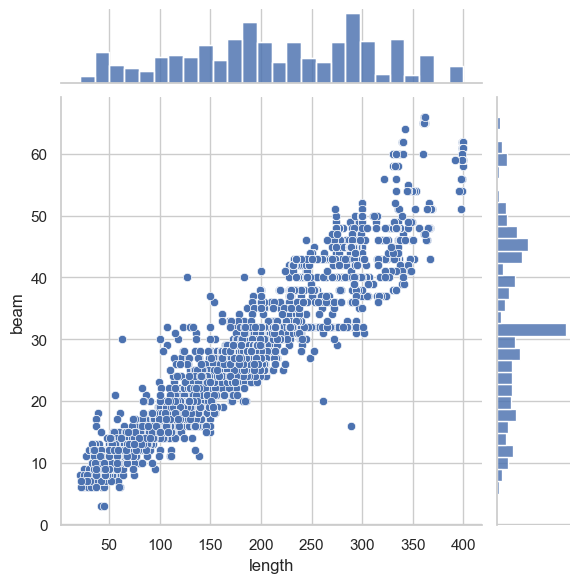

In [5]:
g = sns.jointplot(x='length', y='beam', data=ships)

g.plot_joint(sns.scatterplot)

g.plot_marginals(sns.histplot, alpha=0.3);

## How is the distributions of the dimensions

In [6]:
ships.describe()

,length,beam,GT,DWT,year_built
count,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000
mean,214.177664,32.554781,54034.114915,67306.724228,2005.116907
std,92.304519,13.290055,51286.938142,76186.012743,13.852943
min,21.000000,3.000000,102.000000,10.000000,1895.000000
25%,145.000000,23.000000,12358.000000,7367.750000,1999.000000
50%,210.000000,32.000000,40350.000000,38600.000000,2009.000000
75%,292.000000,43.000000,87026.000000,103891.000000,2015.000000
max,400.000000,66.000000,248663.000000,403844.000000,2025.000000


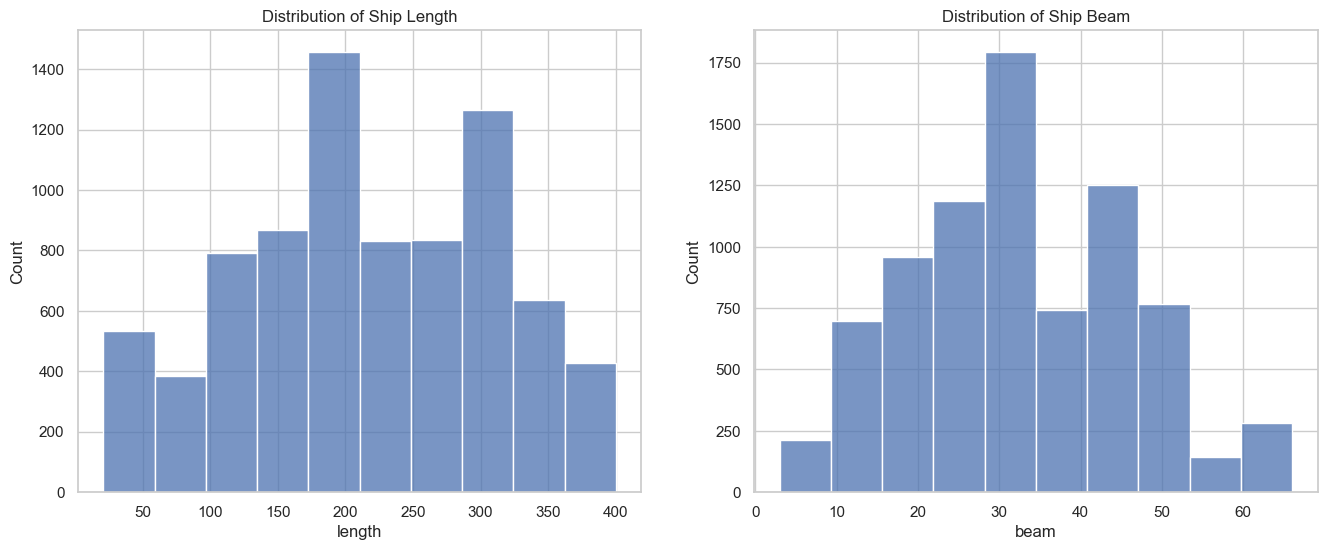

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(ships.length, bins=10, ax=ax[0])
ax[0].set_title('Distribution of Ship Length')  # Add title to first subplot

sns.histplot(ships.beam, bins=10, ax=ax[1])
ax[1].set_title('Distribution of Ship Beam')    # Add title to second subplot

plt.show()

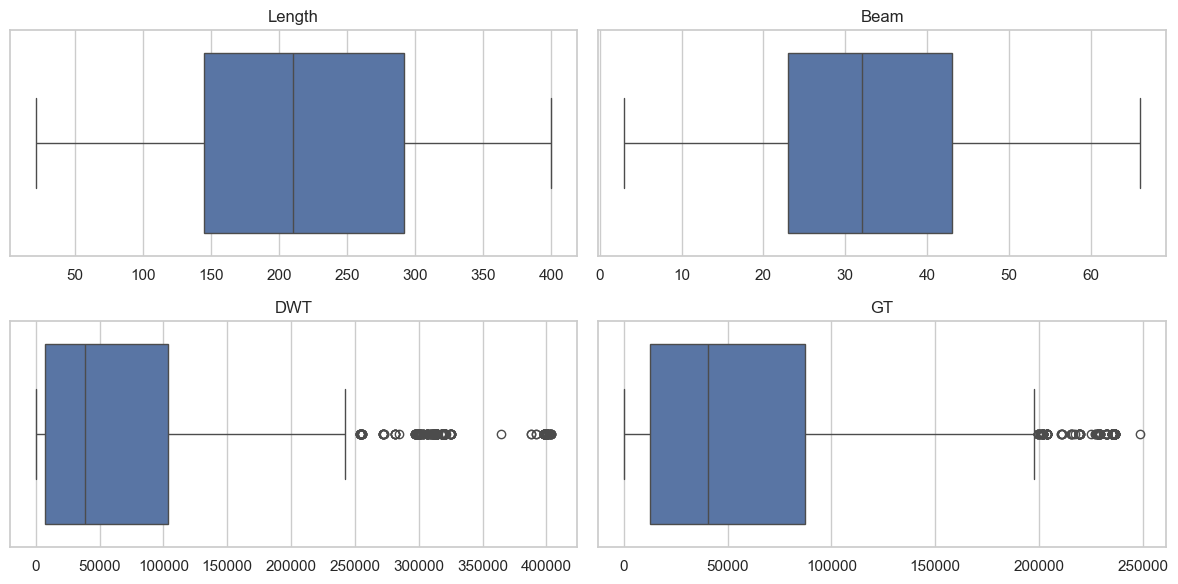

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot( x='length', data=ships, ax=ax[0, 0])
ax[0, 0].set_title('Length')

sns.boxplot( x='beam', data=ships, ax=ax[0, 1])
ax[0, 1].set_title('Beam')

sns.boxplot( x='DWT', data=ships, ax=ax[1, 0])
ax[1, 0].set_title('DWT')

sns.boxplot( x='GT', data=ships, ax=ax[1, 1])
ax[1, 1].set_title('GT')

#remove xlabels from all charts
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('')

plt.tight_layout()
plt.show()

## How does different categories behave 

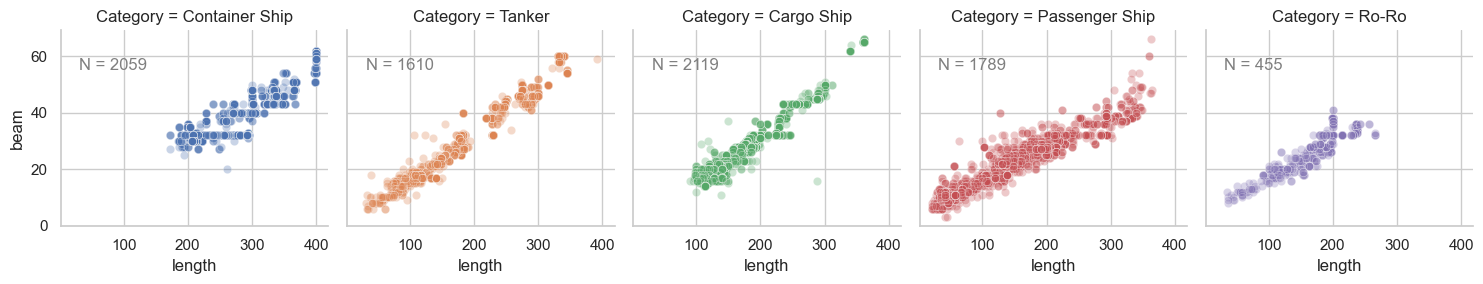

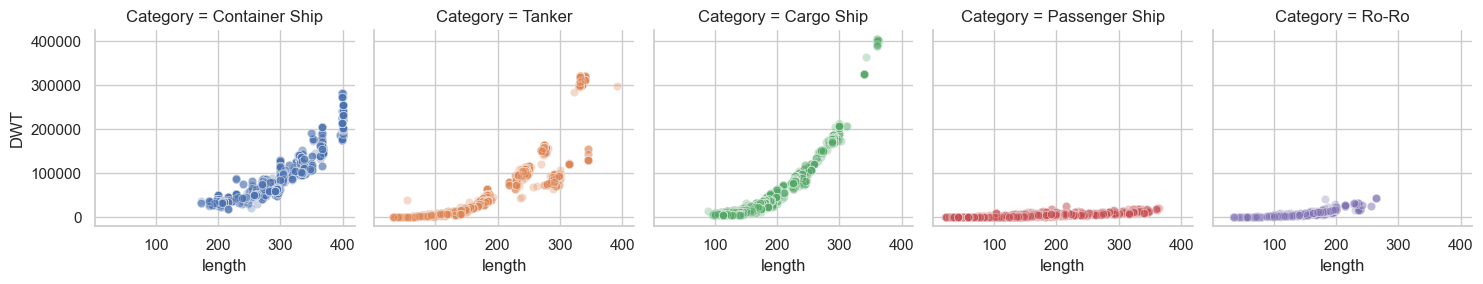

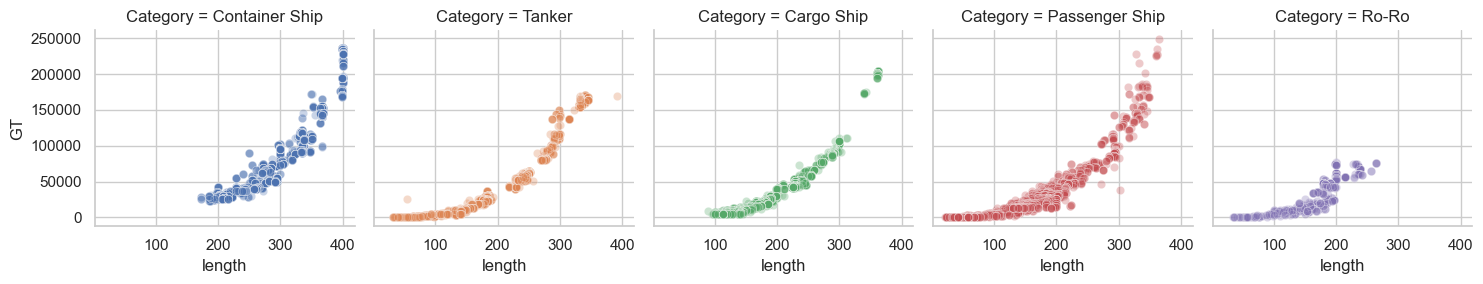

In [9]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.07, .8, f"N = {n}", transform=ax.transAxes, color='Grey' )

g = sns.FacetGrid(ships, col="Category", hue='Category')
g.map_dataframe(sns.scatterplot, x="length", y="beam", alpha=0.3)
g.map_dataframe(annotate)

g = sns.FacetGrid(ships, col="Category", hue='Category')
g.map_dataframe(sns.scatterplot, x="length", y="DWT", alpha=0.3)


g = sns.FacetGrid(ships, col="Category", hue='Category')
g.map_dataframe(sns.scatterplot, x="length", y="GT", alpha=0.3)


**Here’s a similar trend when comparing Length and Beam (width). This means that, in general, as ships get longer, they also tend to become wider, maintaining a proportional relationship between these two dimensions. This trend holds true for most ship types—whether they’re cargo ships, tankers, or even passenger vessels—because the balance between length and width is crucial for stability, performance, and efficiency on the water.**

**You’ll notice that Passenger and Ro-Ro (Roll-on/Roll-off) ships behave differently from other categories when it comes to Deadweight Tonnage (DWT). This is because these ships are designed to carry large volumes of specific types of cargo—such as vehicles, passengers, or lightweight goods—that don’t weigh as much compared to bulkier or denser cargo like oil, coal, or containers. As a result, while they may have significant internal space (reflected in their Gross Tonnage), their DWT tends to be lower, reflecting the lighter nature of their typical loads. This unique characteristic sets them apart from other ship categories, which often carry heavier or denser cargo.**


## Size trend over the years

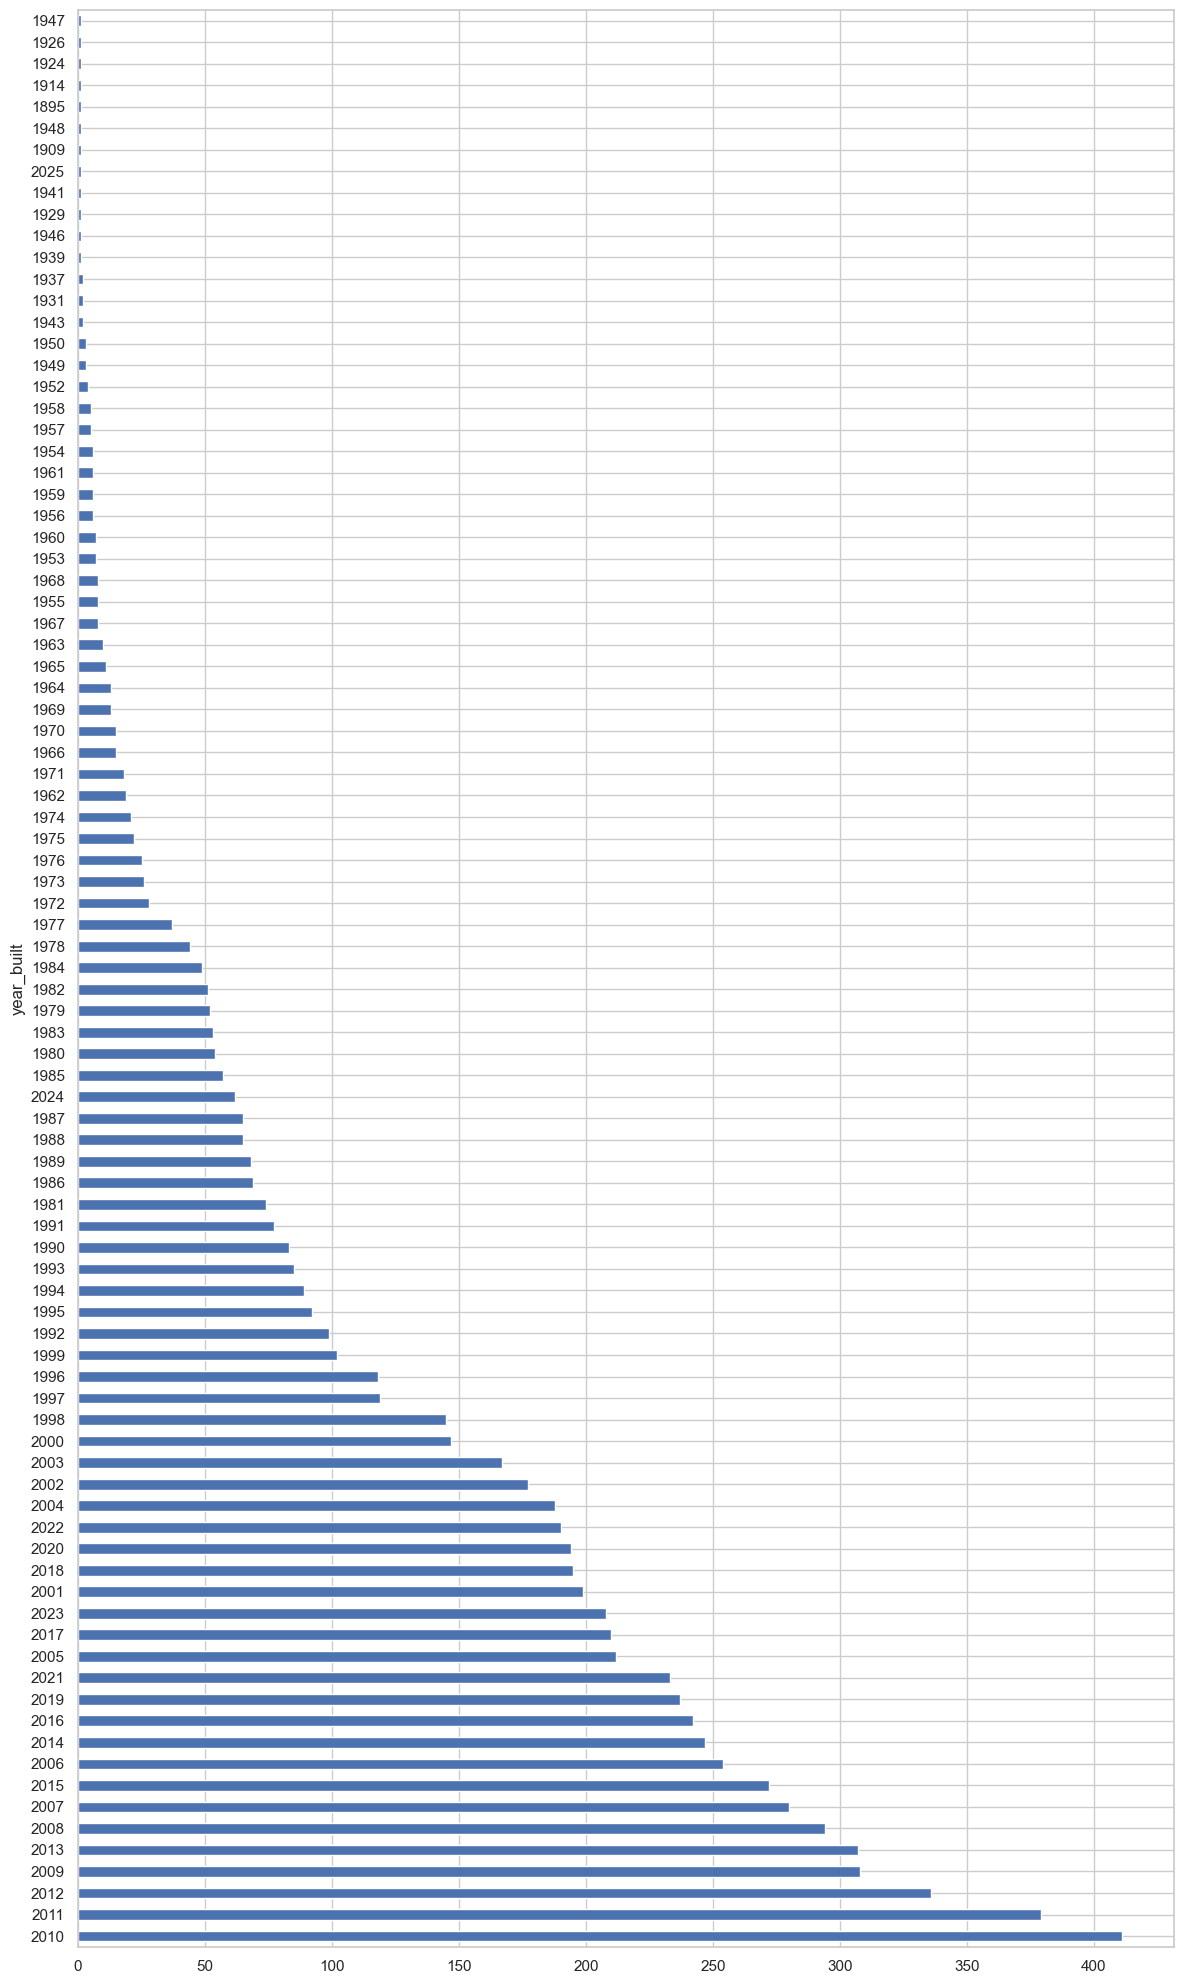

In [10]:
plt.figure(figsize=(12, 20))

ships['year_built'].value_counts().plot(kind='barh')

plt.tight_layout()
plt.show()

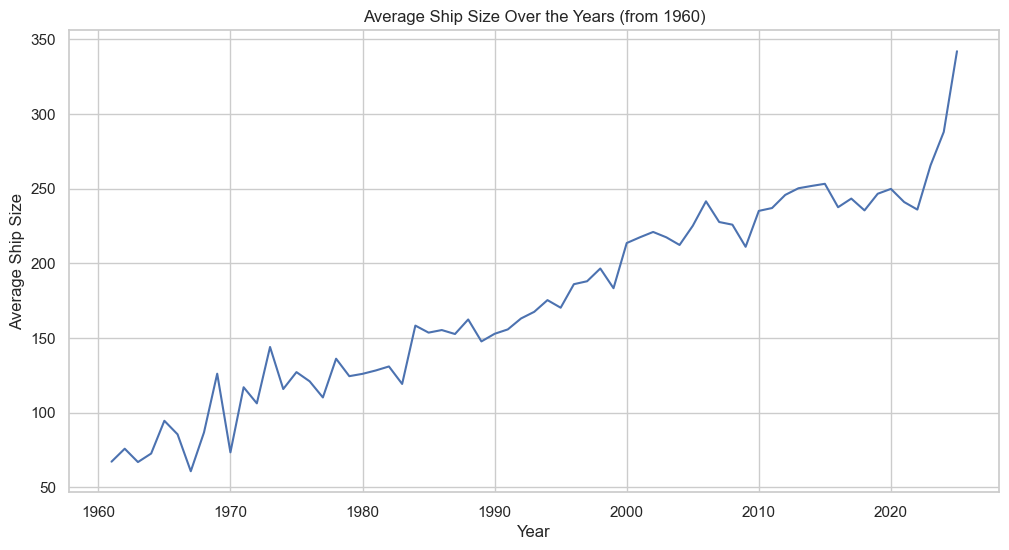

In [11]:
year = ships[ ships['year_built'] > 1960].groupby('year_built')['length'].mean()

plt.figure(figsize=(12, 6))

year.plot()
plt.xlabel('Year')  
plt.ylabel('Average Ship Size')  
plt.title('Average Ship Size Over the Years (from 1960)')

plt.show()

## Passenger Ships

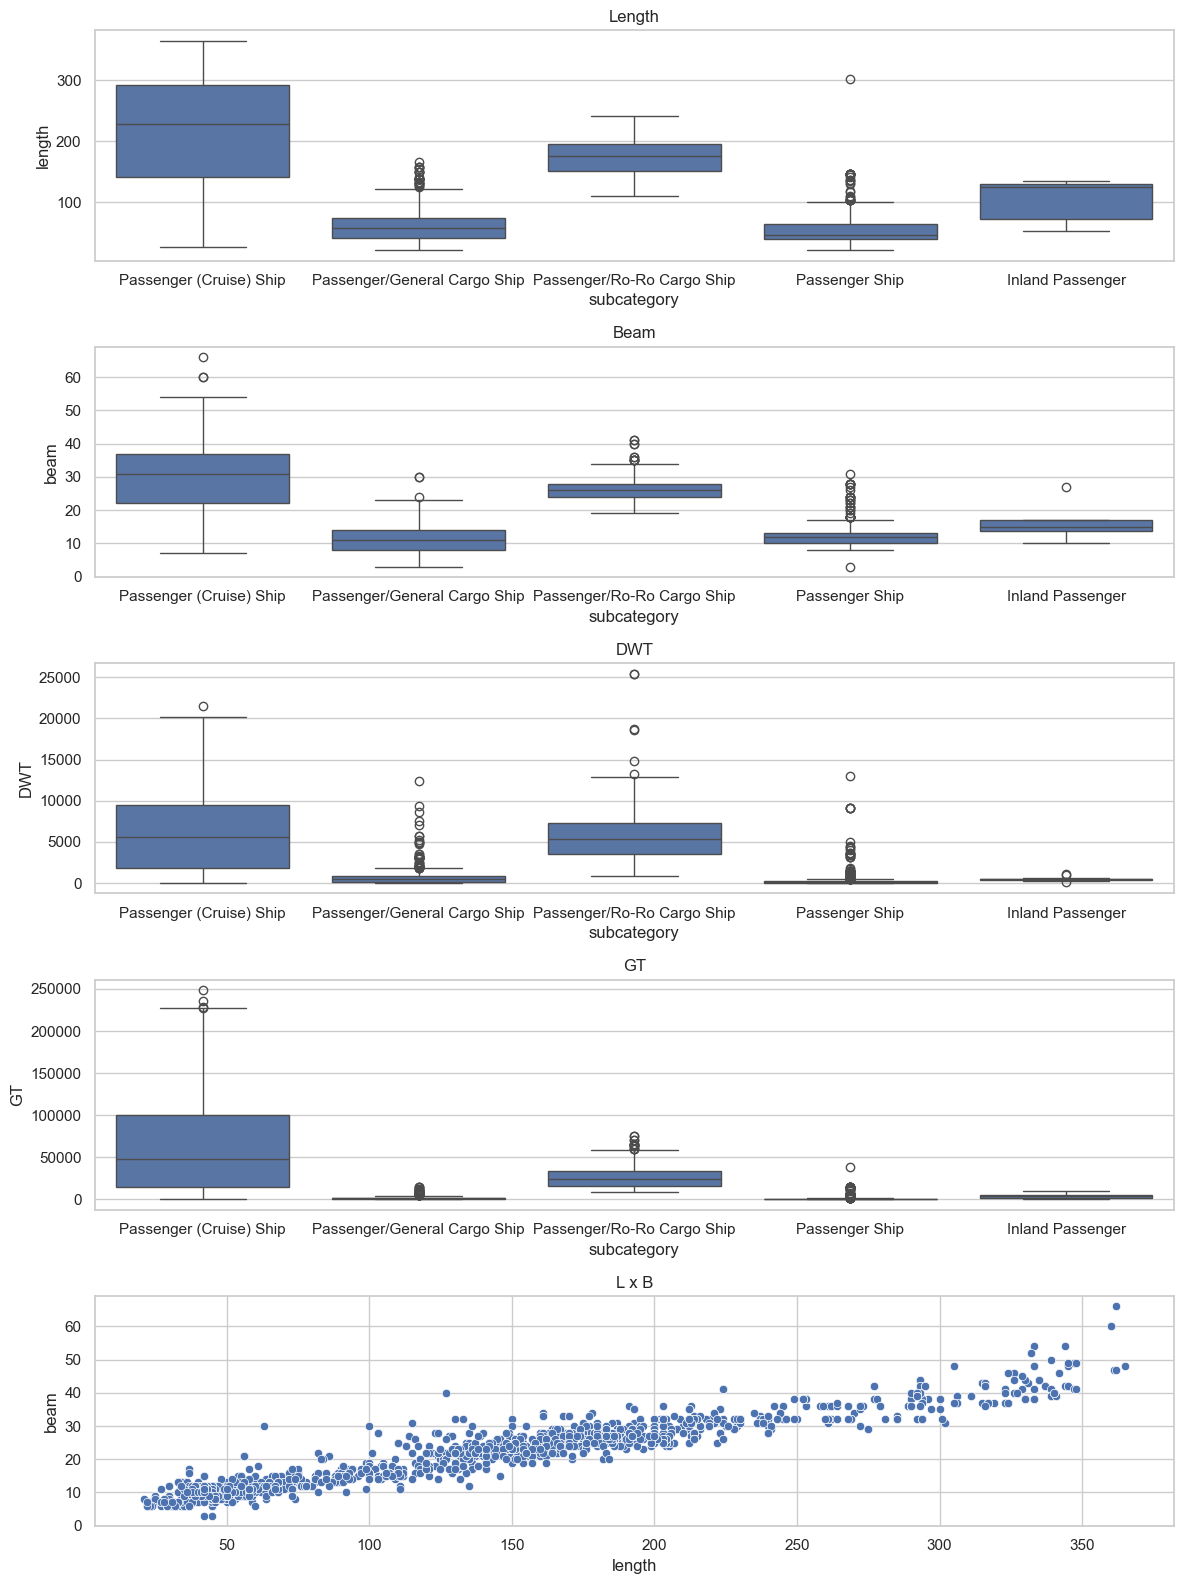

In [12]:
passenger = ships[ships.Category == 'Passenger Ship']

fig, ax = plt.subplots(5, 1, figsize=(12, 16))

sns.boxplot(x='subcategory', y='length', data=passenger, ax=ax[0])
ax[0].set_title('Length')


sns.boxplot(x='subcategory', y='beam', data=passenger, ax=ax[1])
ax[1].set_title('Beam')

sns.boxplot(x='subcategory', y='DWT', data=passenger, ax=ax[2])
ax[2].set_title('DWT')


sns.boxplot(x='subcategory', y='GT', data=passenger, ax=ax[3])
ax[3].set_title('GT')

sns.scatterplot(x='length', y='beam', data=passenger, ax=ax[4])
ax[4].set_title('L x B')


plt.tight_layout()
plt.show()

## Tanker Ships

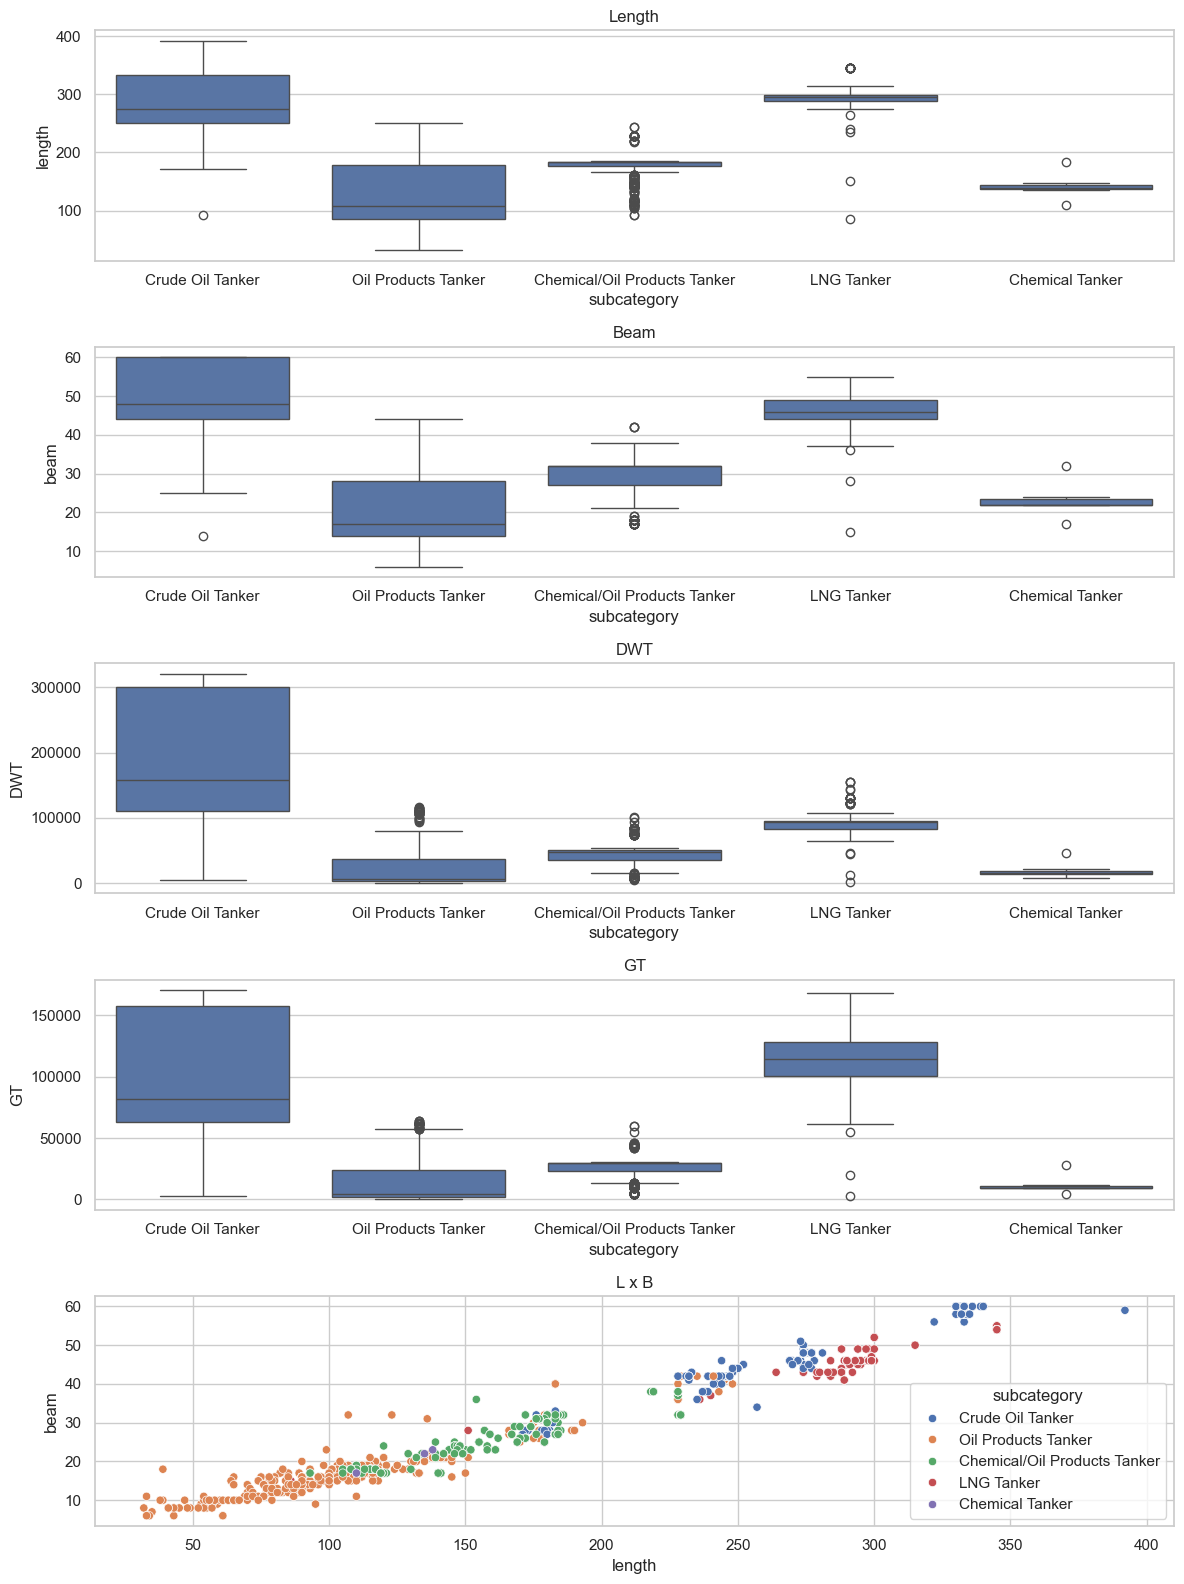

In [13]:
tanker = ships[ships.Category == 'Tanker']

fig, ax = plt.subplots(5, 1, figsize=(12, 16))

sns.boxplot(x='subcategory', y='length', data=tanker, ax=ax[0])
ax[0].set_title('Length')


sns.boxplot(x='subcategory', y='beam', data=tanker, ax=ax[1])
ax[1].set_title('Beam')

sns.boxplot(x='subcategory', y='DWT', data=tanker, ax=ax[2])
ax[2].set_title('DWT')


sns.boxplot(x='subcategory', y='GT', data=tanker, ax=ax[3])
ax[3].set_title('GT')

sns.scatterplot(x='length', y='beam', hue='subcategory', data=tanker, ax=ax[4])
ax[4].set_title('L x B')


plt.tight_layout()
plt.show()

## Container Ships

In [14]:
container = ships[ships.Category == 'Container Ship']


def determine_owner(vessel_name):
    if 'MAERSK' in vessel_name:
        return 'Maersk'
    elif 'MSC' in vessel_name:
        return 'MSC'
    elif 'CMA' in vessel_name:
        return 'CMA CGM'
    elif 'EVER' in vessel_name:
        return 'EVERGREEN'
    elif 'COSCO' in vessel_name:
        return 'COSCO'
    elif 'HMM' in vessel_name:
        return 'HMM'
    else:
        return 'other'

# Apply the function to the 'vessel' column
container['owner'] = container['vessel'].apply(determine_owner).copy()

C:\Users\rafae\AppData\Local\Temp\ipykernel_21892\3511056264.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  container['owner'] = container['vessel'].apply(determine_owner).copy()


**Adding the mos known owners name based on the vessel name**

In [15]:
container.head()

,vessel,Category,subcategory,length,beam,GT,DWT,year_built,owner
0,EVER ACME,Container Ship,Container Ship,400,62,236673,241816,2022,EVERGREEN
1,CC CHAMPS ELYSEES,Container Ship,Container Ship,400,61,236583,220766,2020,other
2,CMA CGM MONTMARTRE,Container Ship,Container Ship,400,61,236583,221103,2021,CMA CGM
3,CMA CGM SORBONNE,Container Ship,Container Ship,400,61,236583,221251,2021,CMA CGM
4,CMA CGM TROCADERO,Container Ship,Container Ship,400,61,236583,220666,2021,CMA CGM


In [16]:
container.owner.value_counts()

owner
other        1158
MSC           392
Maersk        187
CMA CGM       142
EVERGREEN      93
COSCO          63
HMM            24
Name: count, dtype: int64

Text(0.5, 1.0, 'DWT')

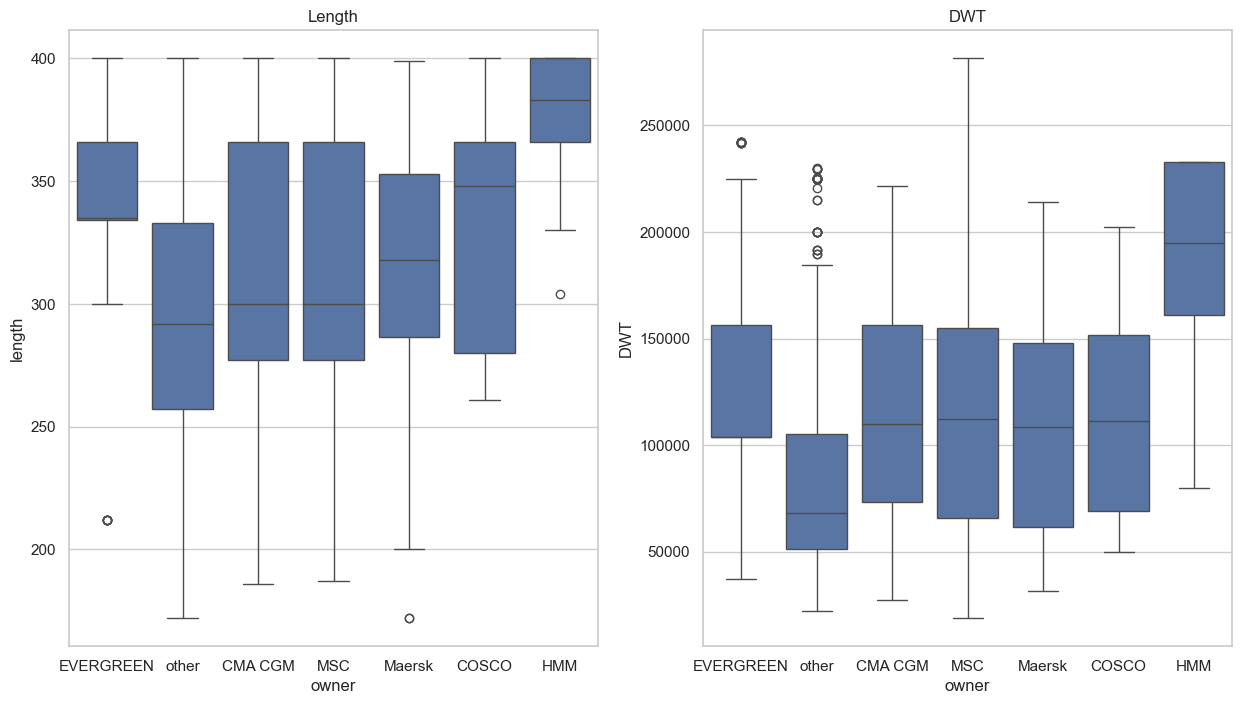

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.boxplot(x='owner', y='length', data=container, ax=ax[0])
ax[0].set_title('Length')


sns.boxplot(x='owner', y='DWT', data=container, ax=ax[1])
ax[1].set_title('DWT')


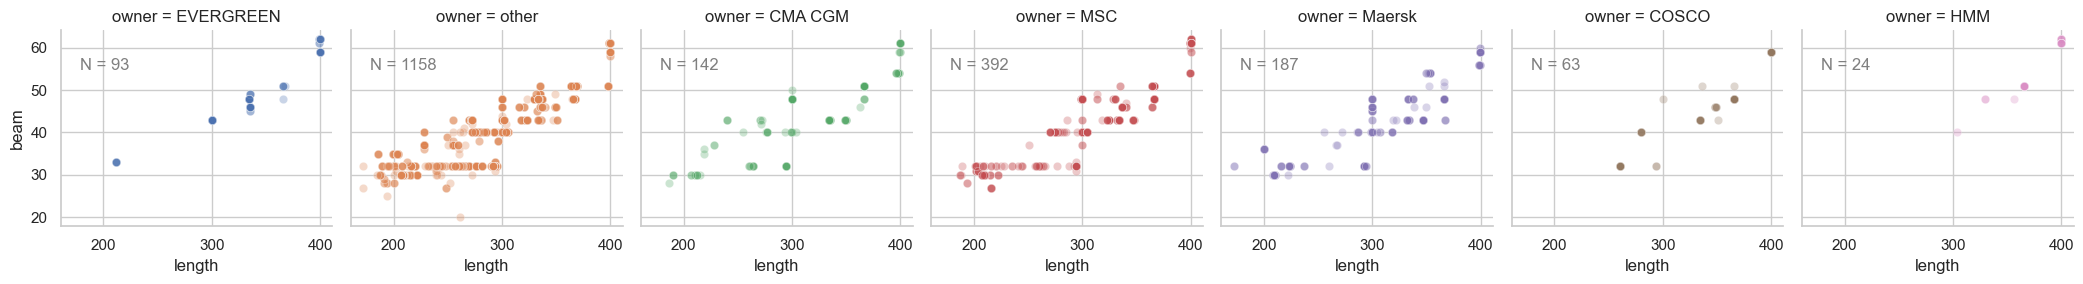

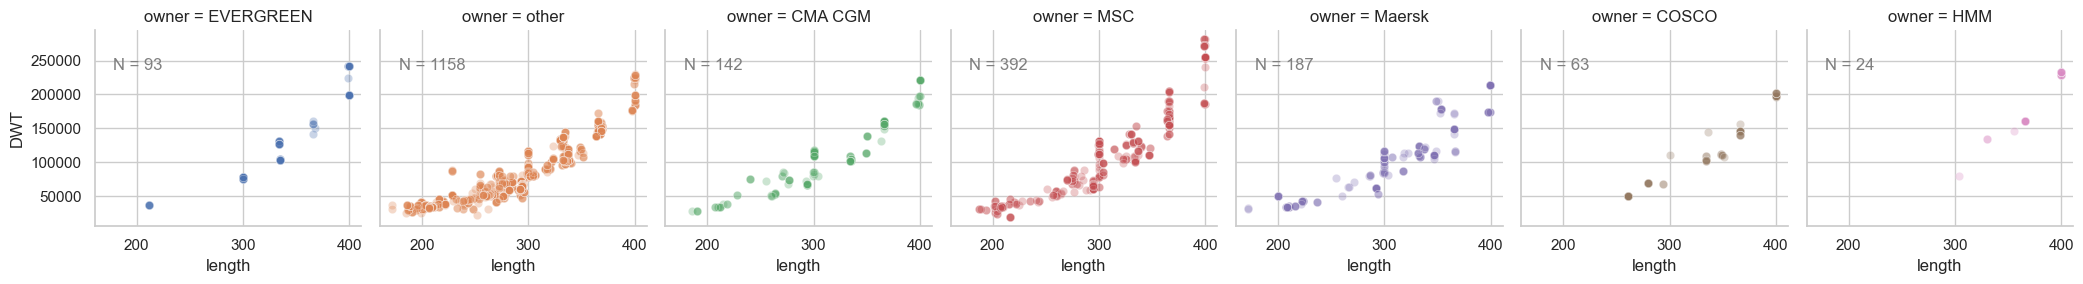

In [18]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.07, .8, f"N = {n}", transform=ax.transAxes, color='Grey' )

g = sns.FacetGrid(container, col="owner", hue='owner')
g.map_dataframe(sns.scatterplot, x="length", y="beam", alpha=0.3)
g.map_dataframe(annotate)

g = sns.FacetGrid(container, col="owner", hue='owner')
g.map_dataframe(sns.scatterplot, x="length", y="DWT", alpha=0.3)
g.map_dataframe(annotate)

## Which are the biggest ships?

In [19]:
big_ships = ships[ ships.length > 399]
big_ships

,vessel,Category,subcategory,length,beam,GT,DWT,year_built
0,EVER ACME,Container Ship,Container Ship,400,62,236673,241816,2022
1,CC CHAMPS ELYSEES,Container Ship,Container Ship,400,61,236583,220766,2020
2,CMA CGM MONTMARTRE,Container Ship,Container Ship,400,61,236583,221103,2021
3,CMA CGM SORBONNE,Container Ship,Container Ship,400,61,236583,221251,2021
4,CMA CGM TROCADERO,Container Ship,Container Ship,400,61,236583,220666,2021
...,...,...,...,...,...,...,...,...
1636,COSCO SAGITTARIUS,Container Ship,Container Ship,400,59,194864,202133,2018
1637,COSCO SHIPPING LIBRA,Container Ship,Container Ship,400,59,194864,201823,2018
1638,COSCO GEMINI,Container Ship,Container Ship,400,59,194864,202015,2018
1639,COSCO TAURUS,Container Ship,Container Ship,400,59,194864,201868,2018


In [20]:
big_ships.Category.value_counts()

Category
Container Ship    101
Name: count, dtype: int64

**Only container ships has ships bigger than 399m**

In [21]:
big_ships['owner'] = big_ships['vessel'].apply(determine_owner).copy()

C:\Users\rafae\AppData\Local\Temp\ipykernel_21892\3005562130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_ships['owner'] = big_ships['vessel'].apply(determine_owner).copy()


<Axes: xlabel='owner'>

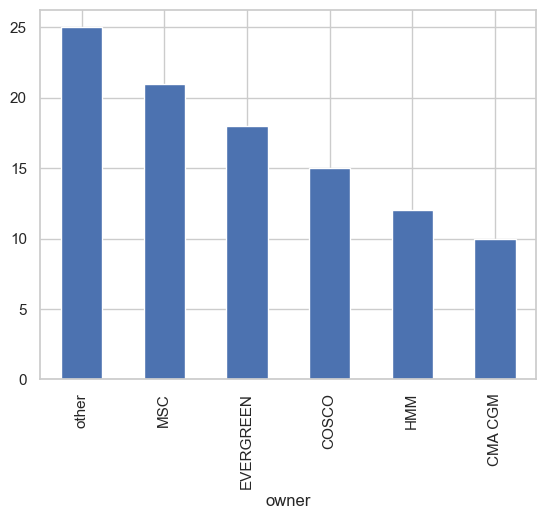

In [22]:
big_ships.owner.value_counts().plot( kind='bar' )

Text(0.5, 1.0, 'Breadth distribution among big ships')

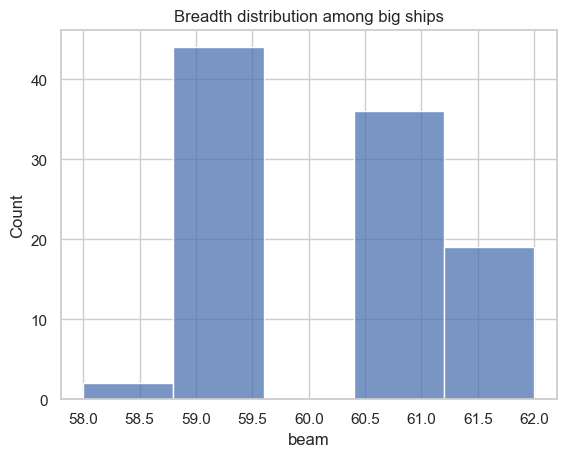

In [23]:
sns.histplot( x='beam', data=big_ships, bins=5)
plt.title('Breadth distribution among big ships')

Text(0.5, 1.0, 'Year built of big ships')

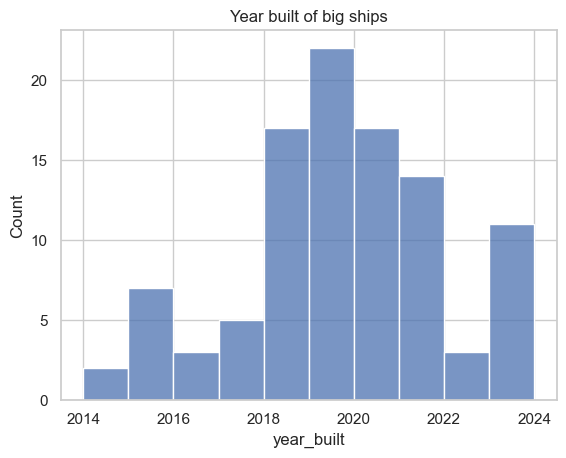

In [24]:
sns.histplot( x='year_built', data=big_ships, bins=10)
plt.title('Year built of big ships')

### Wich is the ship with the highest DWT?

In [25]:
big_ships[ big_ships.beam == big_ships.beam.max() ].sort_values(by='DWT', ascending=False).head(1)

,vessel,Category,subcategory,length,beam,GT,DWT,year_built,owner
22,MSC TESSA,Container Ship,Container Ship,400,62,236078,272373,2023,MSC


**MSC TESSA appears to be the biggest big with the most cargo capacity in this dataset**

![MSC_TESSA](https://static.vesselfinder.net/ship-photo/9930038-636022102-fed86d47acc48ed62c45903f0eaeb15a/1?v1)

# Closing

This was a simple EDA of the ships dataset. the user can explore much more information with the dataset.

Naval specialists may want to include coefficients and other naval architectures information to evaluate the data.

**I hope you enjoy this dataset :)**


# (NEW) Predicting DWT

**For this part,  we are going to predict the DWT of a ship, using Length and Beam as features**

For those who understand the Naval Architecture, I know that to determine a ship DWT it need more than L and B. A complete design of a ship needs several coeficients to evaluate, and other stability and performance analysis.

A rigorous calculation of DWT requires additional parameters and coefficients, such as:

- Block Coefficient (C_B): Reflects the hull's fullness and impacts displacement.
- Draft (T): Directly influences displacement and thus DWT, varying with load conditions.
- Depth (D): Affects the structural volume and capacity.
- Prismatic Coefficient (C_P), Midship Section Coefficient (C_M), and Waterplane Area Coefficient (C_WP): These refine the hull form and its volumetric efficiency.
- Lightship Weight: The weight of the hull, machinery, and outfitting, which must be subtracted from total displacement to derive DWT.

In this simplified regression model, we use only length (L) and beam (B) as predictors for DWT, which assumes a linear relationship between these dimensions and the target variable.
The model serves as a basic exploratory tool rather than a substitute for detailed ship design calculations.

Enjoy 😊

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


## 1. Prepare the data

In [27]:
X = container[['length', 'beam']]  
y = container['DWT']               

scaler = MinMaxScaler() #set Scaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the data

X_train = scaler.fit_transform(X_train) #scale train data

X_test = scaler.transform(X_test) #scale test data

## 2. Model and predict

In [28]:
model = LinearRegression(fit_intercept = False)  #default linear regression
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## 3. Scores

In [30]:
from math import sqrt

In [38]:
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared Score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 17309.025040206736
R-squared Score: 0.8946638697763415


## 4. Ploting the results

In [41]:
X_test_real = scaler.inverse_transform(X_test)

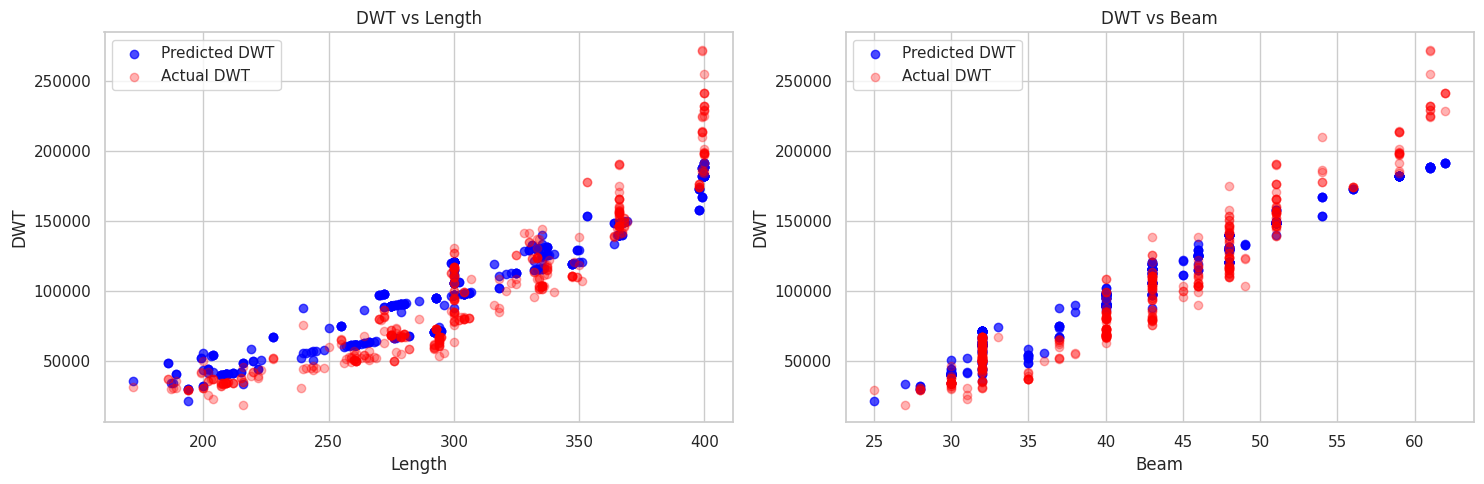

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 

ax[0].scatter(X_test_real[:, 0], y_pred, color='blue', alpha=0.7, label='Predicted DWT')
ax[0].scatter(X_test_real[:, 0], y_test, color='red', alpha=0.3, label='Actual DWT')
ax[0].set_xlabel('Length')
ax[0].set_ylabel('DWT')
ax[0].set_title('DWT vs Length')
ax[0].legend()

ax[1].scatter(X_test_real[:, 1], y_pred, color='blue', alpha=0.7, label='Predicted DWT')
ax[1].scatter(X_test_real[:, 1], y_test, color='red', alpha=0.3, label='Actual DWT')
ax[1].set_xlabel('Beam')
ax[1].set_ylabel('DWT')
ax[1].set_title('DWT vs Beam')
ax[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

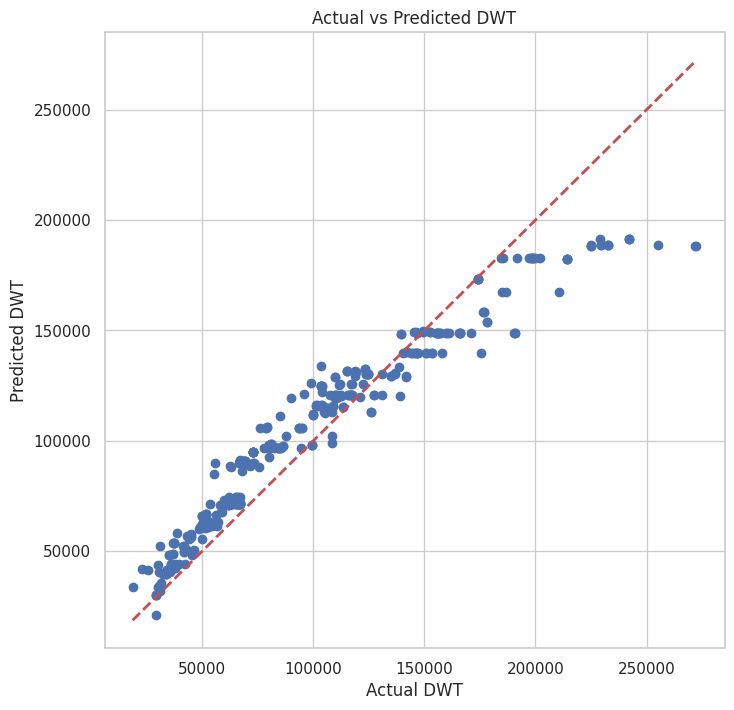

In [42]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual DWT')
plt.ylabel('Predicted DWT')
plt.title('Actual vs Predicted DWT')

plt.show()

**Evaluating the residuals plot, one an see that a linear regression is not the best approach for this task.**

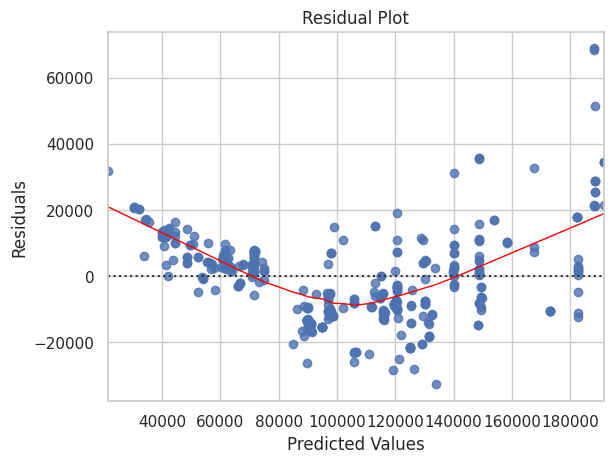

In [43]:
residuals = (y_test - y_pred).values

sns.residplot(x=y_pred.flatten(), y=residuals.flatten(), lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()